In [4]:
# processasing
import pandas as pd 
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
var_predictions = ["gender", "profession", "ideology_binary", "ideology_multiclass"]

In [3]:
reviews_politica = pd.read_csv("../../data/raw/development.csv")
reviews_politica.head()

,Unnamed: 0,label,gender,profession,ideology_binary,ideology_multiclass,tweet
0,36617,@user10,male,journalist,right,moderate_right,"EE UU y China: Los dos grandes pelean, el mund..."
1,11991,@user10,male,journalist,right,moderate_right,Sensación Previsible a esta hora: Alegría [POL...
2,40804,@user10,male,journalist,right,moderate_right,No te salves. no te quedes inmóvil al borde de...
3,48101,@user10,male,journalist,right,moderate_right,"Al menos 25 militares venezolanos, todos de ba..."
4,27627,@user10,male,journalist,right,moderate_right,"Rivera que , con Sanchez ,da una mayoría absol..."


In [4]:
reviews_politica.shape

(5000, 7)

In [5]:
reviews_politica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5000 non-null   int64 
 1   label                5000 non-null   object
 2   gender               5000 non-null   object
 3   profession           5000 non-null   object
 4   ideology_binary      5000 non-null   object
 5   ideology_multiclass  5000 non-null   object
 6   tweet                5000 non-null   object
dtypes: int64(1), object(6)
memory usage: 273.6+ KB


[]

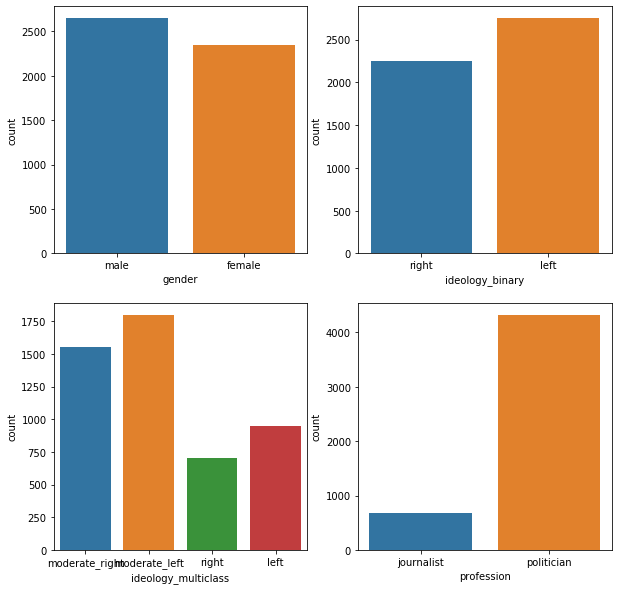

In [7]:
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
for i in range(int(len(var_predictions)/2)):
    sns.countplot(ax=axs[0,i], x=var_predictions[2*i], data=reviews_politica)
    sns.countplot(ax=axs[1,i],x=var_predictions[2*i-1], data=reviews_politica)
plt.plot()

### Observaciones:
Los registros de *gender* y *ideology_binary* estan balanceados, en cambio los registros de profession e ideology_multiclass no lo están.

## Calculemos algunas métricas sobre los textos que se tienen

In [69]:
nltk.FreqDist(tweet_all)


FreqDist({'1-Mañana entrevisto a una mujer coraje que, tras acoger a su sobrino de Níger durante 3 años en los que la Admon le deniega hasta la ayuda de guardería mientras ella paga todos los gastos del niño y el Estado se lleva la pasta como niño “tutelado”. Solicitar su adopción, se lo': 2, 'Parece que no cuajó la reunión del secretario general del [POLITICAL_PARTY] con Zetapé. . La tomadura de pelo de @user a las patronales empresariales para ganar tiempo con la UE está a la altura del trilero que ganó la secretaria general del @user con las urnas tras un biombo.': 2, '3-Han llamado “consenso” y “pacto deseable” a las reuniones secretas de líderes del [POLITICAL_PARTY] con ZP como si éTe fuera algo distinto a un comisionista de narcodictaduras. Y han llamado “consenso” a un pacto tácito o explícito con el [POLITICAL_PARTY] que ha devuelto a Otegi a la vida y que ha': 2, 'Los que llevamos avisando 2 años del carácter criminal de este Gobierno y de su pulsión por la ETA, y que lo de h

In [55]:
tweet_all = [i for i in reviews_politica["tweet"]]


In [59]:
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000)
X = vectorizer.fit_transform(tweet_all)

Proceso de modelado:

1. Representación de los textos: tokenizar, embedigs, TIFD.
2. Descripción del modelo: SVM, RNN, CNN, Bert. 
3. Evaluación: predicción de test y evaluación final. 

### Dataset new

In [26]:
review_train = pd.read_csv("../../data/raw/training.csv")
clas_var = ["label", "gender", "profession", "ideology_binary", "ideology_multiclass", "tweet"]
rewv

In [46]:
lambda_hyper

{'noise_injection': [['delete', '0.3'], ['delete', '0.3']],
 'replacing_synonym': [['-1', '0.3']],
 '-1': [['-1', '-1']],
 'back_translation': [['Helsinki-NLP/opus-mt-es-en',
   'Helsinki-NLP/opus-mt-en-es']],
 'replacing_embeddings': [['fasttext', '-1'],
  ['glove', '-1'],
  ['word2vect', '-1']]}

In [50]:
model_sel=['SVM', 'LogisticRegression', 'CNN', 'RNN']
method_da = ['noise_injection',
 'replacing_synonym',
 'back_translation',
 'replacing_embeddings',
 '-1']
lambda_hyper = {'noise_injection': [['delete', '0.3'], ['delete', '0.3']],
 'replacing_synonym': [['-1', '0.3']],
 '-1': [['-1', '-1']],
 'back_translation': [['Helsinki-NLP/opus-mt-es-en',
   'Helsinki-NLP/opus-mt-en-es']],
 'replacing_embeddings': [['fasttext', '-1'],
  ['glove', '-1'],
  ['word2vect', '-1']]}
preprocesamiento=['1', '-1']
representation={'SVM': ['TFIDF', 'Tokenizer_Keras'],
 'LogisticRegression': ['TFIDF', 'Tokenizer_Keras'],
 'CNN': ['Tokenizer_Keras'],
 'RNN': ['Tokenizer_Keras']}

In [42]:
path_train_a = "/home/est_posgrado_enrique.santibanez/tesis/PolitiES/data/raw/training.csv"
path_test_a = "/home/est_posgrado_enrique.santibanez/tesis/PolitiES/test/development_test.csv"
path_error_a = "/home/est_posgrado_enrique.santibanez/tesis/PolitiES/model/results/errors/logistic_error.csv"
model_errors = model_result["model"]
f = open("test", "w")
for model_name in model_sel:
    for da in method_da:
        for da_sel in lambda_hyper[da]:
            for pre in preprocesamiento:
                for repre in representation[model_name]:
                    if len(model_result[(m==model_result.model) & 
                                        (da==model_result.method_da) & 
                                        (da_sel==[str(model_result.lambda_hyper_1), str(model_result.lambda_hyper_2)]) &
                                        (pre == model_result.preprocesamiento) & 
                                        (repre==model_result.representation)])==0:
                        f.writelines(["python", path_train_a, " ",
                                           path_test_a, " ",
                                           model_name," ",
                                           da," ",
                                           da_sel[0]," ",
                                           da_sel[1]," ",
                                           pre," ",
                                           repre," ",
                                           path_error_a,"\n"])
f.close()

                    

In [ ]:
(path_train=None,
 path_test=None, 
 model_name=None, 
 method_da=["-1"], 
 lambda_hyper=["-1","-1"], 
 preprocess=["-1"], 
    representation=["TFIDF"], path_errors=None):

In [ ]:
python /home/est_posgrado_enrique.santibanez/tesis/PolitiES/src/main.py 
SVM -1 -1 1 TFIDF 

In [28]:
model_result[]

,name_taks,model,method_da,lambda_hyper_1,lambda_hyper_2,preprocesamiento,representation,nrow_df,nrow_df_aug,error_train_gender,error_train_profession,error_train_ideology_binary,error_train_ideology_multiclass,error_train,error_test_gender,error_test_profession,error_test_ideology_binary,error_test_ideology_multiclass,error_test
0,PolitiES,SVM,noise_injection,delete,0.3,1,TFIDF,101,202,0.344156,0.462766,0.352564,0.131387,0.322718,0.444444,0.411765,0.200000,0.083333,0.284886
1,PolitiES,SVM,noise_injection,swap,0.3,1,TFIDF,101,202,0.344156,0.462766,0.352564,0.131387,0.322718,0.444444,0.411765,0.200000,0.083333,0.284886
2,PolitiES,LogisticRegression,noise_injection,swap,0.3,1,TFIDF,101,202,0.885665,0.462766,0.934289,0.841866,0.781147,0.494949,0.411765,0.335038,0.171930,0.353421
3,PolitiES,LogisticRegression,-1,-1,-1.0,-1,TFIDF,101,-1,0.695688,0.462766,0.746867,0.393242,0.574641,0.466667,0.411765,0.548872,0.267857,0.423790
4,PolitiES,LogisticRegression,-1,-1,-1.0,1,TFIDF,101,-1,0.870474,0.462766,0.897358,0.716471,0.736767,0.435737,0.411765,0.595960,0.448413,0.472968
5,PolitiES,CNN,-1,-1,-1.0,1,Tokenizer_Keras,101,101,0.344156,0.121739,0.312925,0.131387,0.227552,0.444444,0.230769,0.428571,0.083333,0.296780
6,PolitiES,RNN,-1,-1,-1.0,1,Tokenizer_Keras,101,101,0.344156,0.121739,0.312925,0.267106,0.261482,0.444444,0.230769,0.428571,0.083333,0.296780
7,PolitiES,SVM,replacing_synonym,-1,0.5,1,Tokenizer_Keras,101,202,1.000000,0.989476,0.995005,1.000000,0.996120,0.373219,0.466667,0.560440,0.312500,0.428206
8,PolitiES,SVM,replacing_synonym,-1,0.5,-1,Tokenizer_Keras,101,202,1.000000,0.989787,1.000000,1.000000,0.997447,0.450549,0.466667,0.450549,0.267857,0.408906
